# Algerian Forest Fire Dataset - Temperature Prediction

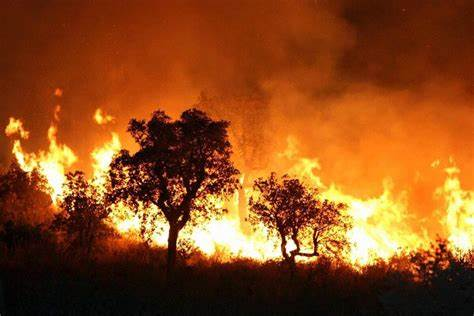

## Problem Statement :-

The dataset is the collection of Algerian Forest Fire incidents with records of around 4 months. From this
data obtain the sub data of weather observation and take the output as Rain like in what types of 
conditions are favourable for the rain to happen.

## Data Collection :-

Dataset is available at https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#.
There are 14 columns and 247 rows in the dataset. The period from June 2012 to September 2012. 

## Attribute Information :-

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire.

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Data reading :-

In [2]:
data = pd.read_csv('D:\Algerian_forest_fires_dataset_UPDATE.csv')

In [3]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


### Shape of dataset(How many rows and columns).

In [4]:
data.shape

(247, 14)

## Data Cleaning

#### Checking if any NaN values are in the dataset.

In [5]:
data.loc[data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [6]:
data.loc[122:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


In [7]:
data.drop([122,123,124,168],axis=0,inplace=True)

In [8]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [9]:
data.shape

(243, 14)

### Columns of dataset :-

In [10]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [11]:
# There are some extra spaces in column name such as RH, WS, Classes.

[x for x in data.columns if x.endswith(' ') or x.startswith(' ')]

[' RH', ' Ws', 'Rain ', 'Classes  ']

In [12]:
# Remove extra spaces in column  names.

data.columns = data.columns.str.strip()
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [13]:
# Creating a new column.
data['date']=pd.to_datetime(data[['day','month','year']])

In [14]:
# Dropping day, month, year from dataset.
data.drop(['day','month','year'],axis=1,inplace=True)

In [15]:
data.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'date'],
      dtype='object')

In [16]:
# Creating Region column.
data['Region']=0
for i in range(len(data)):
    if i<122:
        data['Region'][i]=0
    else:
        data['Region'][i]=1
data  

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,2012-06-01,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,2012-06-02,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,2012-06-03,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,2012-06-04,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,2012-06-05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2012-09-26,1
243,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2012-09-27,0
244,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2012-09-28,0
245,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2012-09-29,0


In [17]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,2012-06-01,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,2012-06-02,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,2012-06-03,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,2012-06-04,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,2012-06-05,0


### Information about dataset such as data type, column etc.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 246
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  243 non-null    object        
 1   RH           243 non-null    object        
 2   Ws           243 non-null    object        
 3   Rain         243 non-null    object        
 4   FFMC         243 non-null    object        
 5   DMC          243 non-null    object        
 6   DC           243 non-null    object        
 7   ISI          243 non-null    object        
 8   BUI          243 non-null    object        
 9   FWI          243 non-null    object        
 10  Classes      243 non-null    object        
 11  date         243 non-null    datetime64[ns]
 12  Region       243 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 34.7+ KB


## Data checks to perform.

#### 1.Check missing values.
#### 2.Check duplicates.
#### 3.Check data types.
#### 4.Check the number of unique values of each columns.
#### 5.Check statistics of data set.
#### 6.Check various categories preset=nt in the different categorical column.

In [19]:
#1.Checking missing values.
data.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
date           0
Region         0
dtype: int64

In [20]:
# Converting output variable into 0 and 1 of classes column.
data['Classes'] = data['Classes'].map({'not fire' : 0, 'fire' : 1 })

In [21]:
#2.Checking duplicates.
data.duplicated().sum()

0

#### No duplicate value in dataset.

In [22]:
#3.Checking data types.
data.dtypes

Temperature            object
RH                     object
Ws                     object
Rain                   object
FFMC                   object
DMC                    object
DC                     object
ISI                    object
BUI                    object
FWI                    object
Classes               float64
date           datetime64[ns]
Region                  int64
dtype: object

In [23]:
data[['Temperature','RH','Ws']]=data[['Temperature','RH','Ws']].astype(int)
data[['Rain','FFMC','DMC','ISI','BUI']]=data[['Rain','FFMC','DMC','ISI','BUI']].astype(float)

In [24]:
#4.Checking the number of unique values of each column.
data.nunique()

Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            125
Classes          2
date           122
Region           2
dtype: int64

In [25]:
#5.Check statistics of data.
data.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,6.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,4.742387,16.690535,0.666667,0.481481
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,4.154234,14.228421,0.516398,0.500688
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,1.400000,6.000000,0.250000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,3.500000,12.400000,1.000000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,7.250000,22.650000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000,1.000000


## Insights

In [26]:
#Categorical features
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='0']
print(categorical_features)

[]


In [27]:
for feature in categorical_features:
    print(data.groupby(feature)['Region'].value_counts())

In [28]:
#Numerical features
Numerical_features=[feature for feature in data.columns if data[feature].dtypes!='0']
print(Numerical_features)

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'date', 'Region']


In [31]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,NaN,2012-06-01,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,NaN,2012-06-02,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,NaN,2012-06-03,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,NaN,2012-06-04,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,NaN,2012-06-05,0


In [33]:
#dropping index and classes feature
data.drop(['Classes'],axis=1,inplace=True)

In [34]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,date,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,2012-06-01,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,2012-06-02,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,2012-06-03,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,2012-06-04,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,2012-06-05,0


## Graphical Analysis :-

<AxesSubplot:xlabel='Temperature', ylabel='date'>

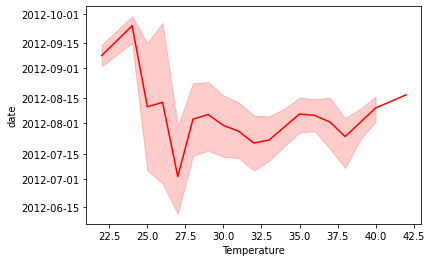

In [48]:
# Temperature vs Date
sns.lineplot(x="Temperature",y="date",data=data,color='r')

<AxesSubplot:xlabel='Region', ylabel='Temperature'>

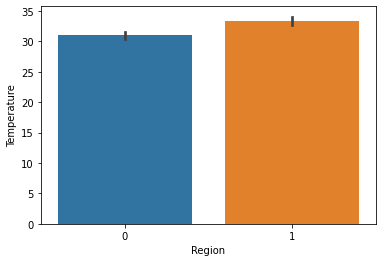

In [49]:
# Temperature vs Region
sns.barplot(x="Region",y="Temperature",data=data)

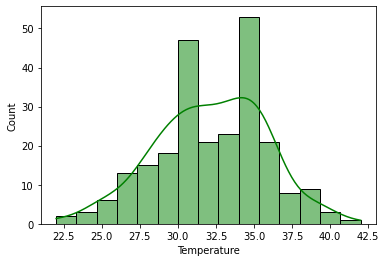

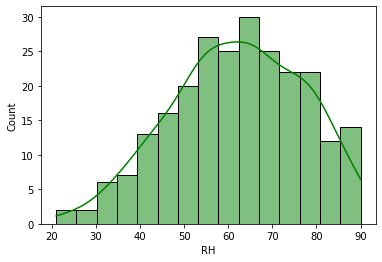

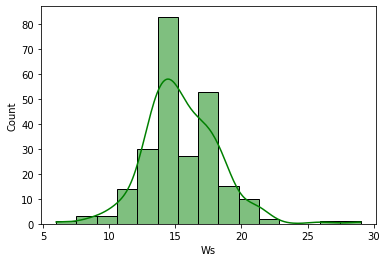

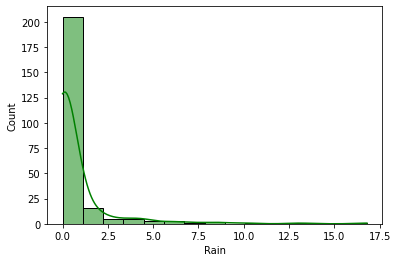

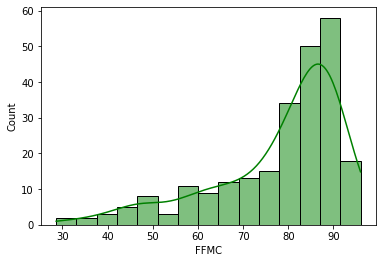

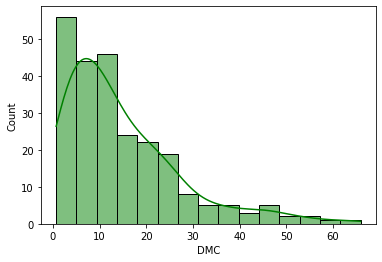

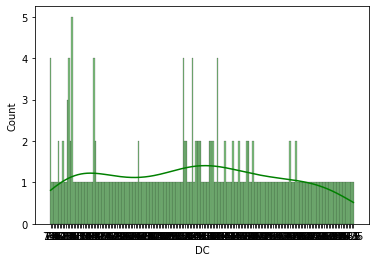

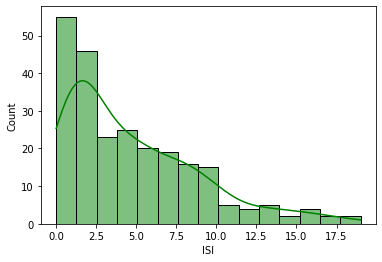

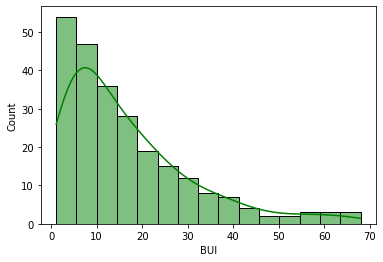

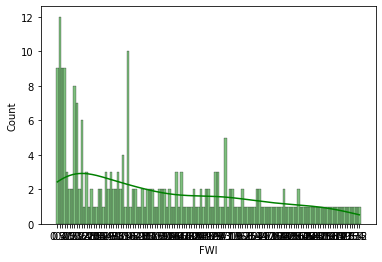

ValueError: Could not interpret value `Classes` for parameter `x`

In [47]:
for fea in Numerical_features:
    sns.histplot(data=data,x=fea,kde=True,bins=15,color='green')
    plt.show()

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

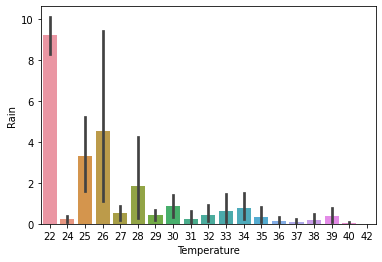

In [50]:
sns.barplot(x=data.Temperature,y=data.Rain)

<AxesSubplot:>

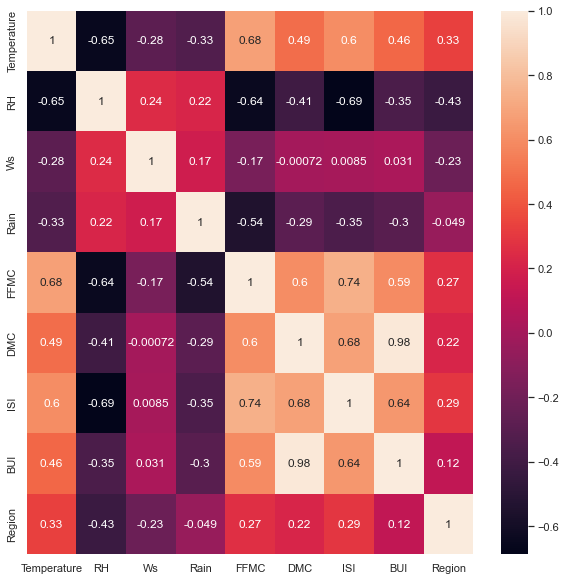

In [52]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(data.corr(),annot=True)

## Checking outlier

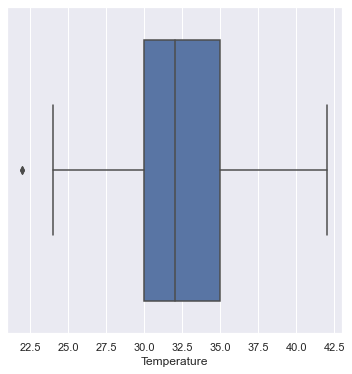

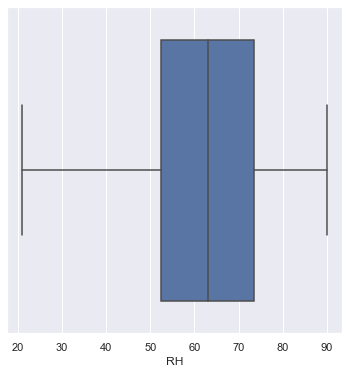

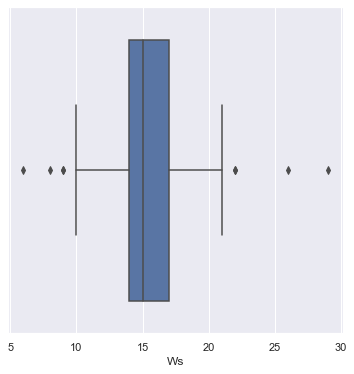

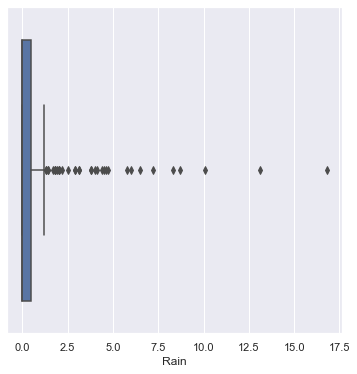

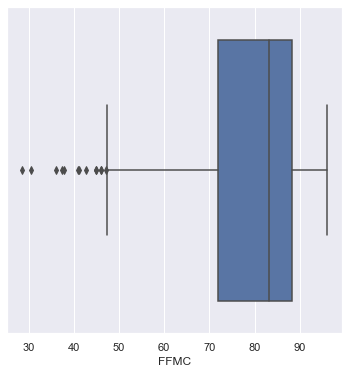

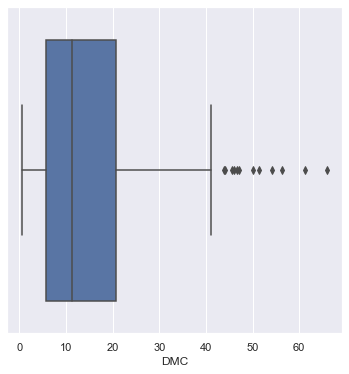

TypeError: Horizontal orientation requires numeric `x` variable.

In [53]:
sns.set(rc={'figure.figsize':(6,6)})
for fea in Numerical_features:
    sns.boxplot(x=data[fea])
    plt.show()

In [55]:
def find_boundaries(data, variable, distance):
    IQR = data[variable].quantile(0.75) - data[variable].quantile(0.25)
    lower_boundary = data[variable].quantile(0.25) - (IQR*distance)
    upper_boundary = data[variable].quantile(0.75) + (IQR*distance)
    return upper_boundary,lower_boundary 

In [57]:
upper_boundary, lower_boundary = find_boundaries(data, 'Rain', 1.5)
upper_boundary, lower_boundary

(1.25, -0.75)

## Creating depedent and indepedent features

In [58]:
# Independent feature
X=pd.DataFrame(data,columns=['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','FWI', 'Region'])

# Dependent Feature
Y=pd.DataFrame(data,columns=['Temperature'])


In [60]:
X

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...
242,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
243,87,15,4.4,41.1,6.5,8,0.1,6.2,0,0
244,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
245,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


In [61]:
Y

,Temperature
0,29
1,29
2,26
3,25
4,27
...,...
242,30
243,28
244,27
245,24


## Splitting the dataset for training and testing the model.

In [62]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_test, y_train, y_test = train_test_split(
X, Y, test_size=0.33, random_state=10)

In [67]:
x_train.shape

(162, 10)

In [68]:
y_train.shape

(162, 1)

In [69]:
x_test.shape

(81, 10)

In [70]:
y_test.shape

(81, 1)

## Standardize or feature scaling the datasets

In [71]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [73]:
x_train=scalar.fit_transform(x_train)

In [75]:
x_test=scalar.transform(x_test)

In [76]:
x_train

array([[ 0.06835876,  0.89673457, -0.42406458, ...,  0.38986031,
         0.52024214, -0.9877296 ],
       [ 0.99672801, -0.58185068,  0.40434065, ..., -1.0010797 ,
        -0.93452011, -0.9877296 ],
       [ 0.53254338,  0.52708826, -0.42406458, ...,  2.19373563,
         1.30997022,  1.01242284],
       ...,
       [-2.45150064, -0.95149699, -0.42406458, ...,  0.44781614,
         1.72561657,  1.01242284],
       [ 0.06835876, -0.58185068, -0.42406458, ..., -0.76925637,
        -0.8098262 ,  1.01242284],
       [ 1.0630401 , -1.3211433 , -0.42406458, ..., -0.26214282,
        -0.82368108, -0.9877296 ]])

In [77]:
x_test

array([[-4.14469819, -5.97197799, -0.67499124, -5.07472134, -1.23855901,
        -1.02728264, -1.20393232, -1.20181045, -1.01066644, -2.96333935],
       [-4.23704135, -5.28878601, -0.67499124, -5.04937065, -1.2234485 ,
        -1.02759273, -0.86745531, -1.19498773, -0.8820548 ,  1.0372704 ],
       [-4.20626029, -5.6987012 , -0.67499124, -5.04805941, -1.13494406,
        -1.01709409, -0.91878231, -1.13515771, -0.82638708,  1.0372704 ],
       [-4.09632796, -5.01550922,  1.35576403, -5.22420298, -1.2846101 ,
        -1.03897732, -1.36361632, -1.24432126, -1.07785162, -2.96333935],
       [-4.10072526, -5.97197799,  0.0252692 , -5.2237659 , -1.29036649,
        -1.03902162, -1.36931932, -1.24642056, -1.07785162,  1.0372704 ],
       [-4.19746571, -5.6987012 , -0.67499124, -5.05155606, -1.10616213,
        -1.01532217, -0.97010931, -1.11468954, -0.83022624,  1.0372704 ],
       [-4.18867112, -5.42542441, -0.56995217, -5.09963495, -1.22488759,
        -1.02156819, -1.26096232, -1.18606571

## Model Training

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
regression=LinearRegression()

In [80]:
regression

LinearRegression()

In [81]:
regression.fit(x_train,y_train)

LinearRegression()

## Print the coefficients and the intercept

In [83]:
print(regression.coef_)

[[-1.47132466 -0.71533904 -0.24753785  0.93261587  0.10103014  0.34164618
   0.28912632  0.26866395 -0.44993476  0.12849147]]


In [84]:
print(regression.intercept_)

[32.07407407]


## Prediction for the test data

In [85]:
reg_pred = regression.predict(x_test)

In [86]:
reg_pred

array([[36.80547941],
       [37.03299019],
       [37.27086826],
       [35.3720049 ],
       [36.9036643 ],
       [37.25056719],
       [36.42968234],
       [37.32076985],
       [37.15002479],
       [36.86068322],
       [37.74680353],
       [36.88332748],
       [37.38948703],
       [36.68990824],
       [37.10736941],
       [36.58683005],
       [36.20725743],
       [37.41710257],
       [36.8526135 ],
       [34.45433547],
       [36.44371746],
       [37.09361225],
       [36.59954785],
       [37.69612626],
       [36.41027994],
       [37.22057367],
       [37.1917574 ],
       [36.96584843],
       [36.78471087],
       [37.96315573],
       [37.04996007],
       [37.44161801],
       [37.22744955],
       [36.78035495],
       [36.10950941],
       [36.39270487],
       [36.88655629],
       [37.07676151],
       [36.49732179],
       [36.93846804],
       [37.37827734],
       [37.47067584],
       [36.95444634],
       [38.10812543],
       [36.62574645],
       [37

### Assumptions of Linear Regression

Text(0, 0.5, 'Test Predicted Data')

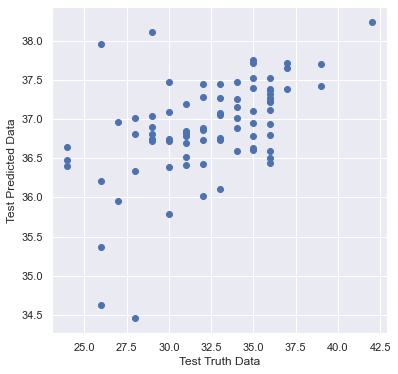

In [88]:
plt.scatter(y_test, reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

## Residuals

In [89]:
residuals=y_test-reg_pred

In [90]:
residuals

,Temperature
46,-7.805479
229,-8.032990
184,-1.270868
116,-9.372005
127,-7.903664
...,...
130,-2.709495
245,-12.482008
211,-4.440959
102,-5.793197


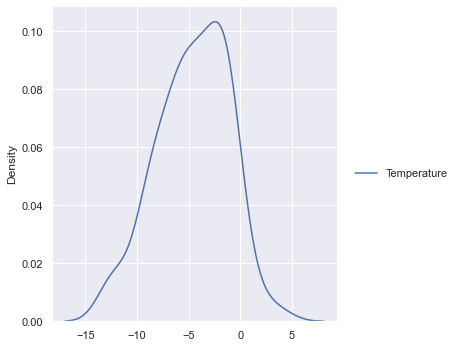

In [91]:
sns.displot(residuals,kind='kde')

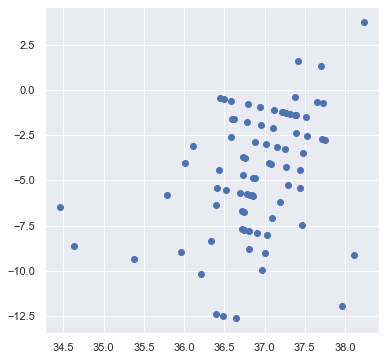

In [93]:
# Scatter plot with predictions and residual 
plt.scatter(reg_pred,residuals)

## Performance metrics

In [95]:
## Performance matric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

32.884756582524275
4.751076743755498
5.734523221901213


In [97]:
# R square and adjusted r square
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
score

-1.3755492814447918

In [98]:
# adjusted r square
1-(1-score)*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1)

-1.748849882814688

## Ridge regression

In [99]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [102]:
ridge.fit(x_train,y_train)

Ridge()

In [103]:
print(ridge.coef_)

[[-1.45439696 -0.71415886 -0.24907121  0.93693182  0.12434882  0.34200445
   0.23162189  0.19632635 -0.34815191  0.13067317]]


In [104]:
print(ridge.intercept_)

[32.07407407]


In [105]:
rid_pred=ridge.predict(x_test)
rid_pred

array([[36.72498823],
       [36.95417993],
       [37.1984581 ],
       [35.29404362],
       [36.83561547],
       [37.18004276],
       [36.34933083],
       [37.24983384],
       [37.07744826],
       [36.77856278],
       [37.67386172],
       [36.80049654],
       [37.31357308],
       [36.61248632],
       [37.03515191],
       [36.50490547],
       [36.13085146],
       [37.32751722],
       [36.77180525],
       [34.369147  ],
       [36.3634025 ],
       [37.02001453],
       [36.52337733],
       [37.62378629],
       [36.33088756],
       [37.14687662],
       [37.10944675],
       [36.89398031],
       [36.70437057],
       [37.88944942],
       [36.96491713],
       [37.36635335],
       [37.15262501],
       [36.69890818],
       [36.0339373 ],
       [36.31519261],
       [36.81205499],
       [37.00495062],
       [36.41349398],
       [36.85635472],
       [37.30689927],
       [37.39238419],
       [36.87225899],
       [38.03460187],
       [36.54351   ],
       [37

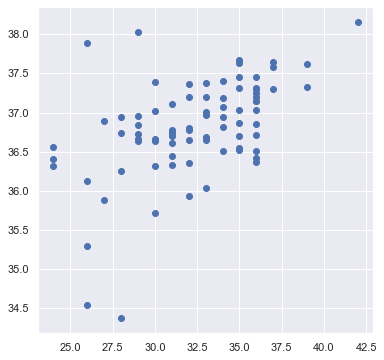

In [106]:
#Assumption on ridge regression
plt.scatter(y_test,rid_pred)

In [107]:
## residual
rid_residual=y_test-rid_pred

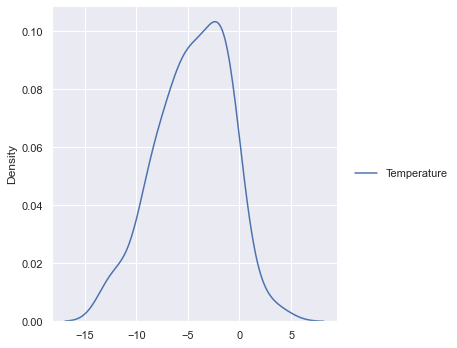

In [108]:
sns.displot(rid_residual,kind="kde")

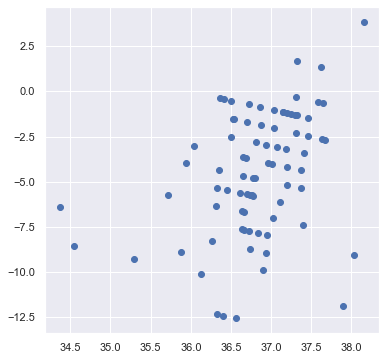

In [109]:
##scatter plot with prediction and residuals
## uniform distribution
plt.scatter(rid_pred,rid_residual)

## Performance metrics

In [111]:
## Performance matric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,rid_pred))
print(mean_absolute_error(y_test,rid_pred))
print(np.sqrt(mean_squared_error(y_test,rid_pred)))

32.1844841525888
4.680122998377764
5.673137064498689


In [112]:
# R square and adjusted r square
from sklearn.metrics import r2_score
rid_score=r2_score(y_test,rid_pred)
rid_score

-1.3249625707427017

In [113]:
# adjusted r square
1-(1-rid_score)*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1)

-1.6903138318594118

## Lasso Regression

In [114]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [115]:
lasso.fit(x_train,y_train)

Lasso()

In [116]:
print(lasso.coef_)

[-0.88423537 -0.         -0.          0.88313134  0.          0.
  0.          0.          0.          0.        ]


In [118]:
print(lasso.intercept_)

[32.07407407]


In [119]:
las_pred=lasso.predict(x_test)
las_pred

array([31.25731733, 31.3613584 , 31.33529871, 31.08253474, 31.08680898,
       31.32443422, 31.27419776, 31.36248816, 31.26966932, 31.32628891,
       31.28660625, 31.30074702, 31.41852403, 31.23235914, 31.31338145,
       31.34734943, 31.08179099, 31.44325626, 31.28332054, 31.10147698,
       31.28227551, 31.27205123, 31.29763077, 31.2459068 , 31.20247712,
       31.30772326, 31.31644121, 31.281946  , 31.26060304, 31.25598046,
       31.34037319, 31.32876495, 31.36036987, 31.29570077, 31.21876442,
       31.12965496, 31.31073594, 31.26689201, 31.34812143, 31.33908339,
       31.34073095, 31.39555234, 31.33918695, 31.37432235, 31.31784398,
       31.43001929, 31.28087274, 31.37180864, 31.24041807, 31.2192634 ,
       31.27512981, 31.48712844, 31.26821006, 31.3644464 , 31.06436451,
       31.41763906, 31.33995895, 31.29123824, 31.11779252, 31.27135454,
       31.26032059, 31.22128755, 31.0728565 , 31.4230713 , 31.35118119,
       31.141781  , 31.21651433, 31.18168962, 31.39472385, 31.15

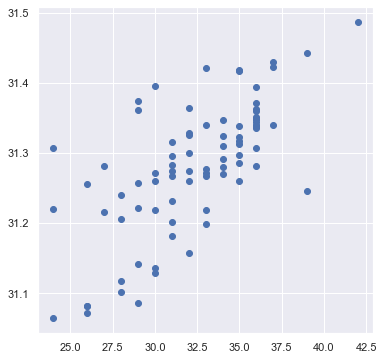

In [120]:
#Assumption on ridge regression
plt.scatter(y_test,las_pred)

## Performance metrics on Lasso Regression

In [121]:
## Performance matric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,las_pred))
print(mean_absolute_error(y_test,las_pred))
print(np.sqrt(mean_squared_error(y_test,las_pred)))

14.435192775924262
3.1542898946813307
3.7993674178636976


In [123]:
# R square and adjusted r square
from sklearn.metrics import r2_score
Las_score=r2_score(y_test,las_pred)
Las_score

-0.042778338355931256

In [124]:
# adjusted r square
1-(1-Las_score)*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1)

-0.2066435058118632

## Elastic Net

In [125]:
from sklearn.linear_model import ElasticNet

In [126]:
elas=ElasticNet()

In [127]:
elas.fit(x_train,y_train)

ElasticNet()

In [129]:
print(elas.coef_)

[-0.77155493 -0.27327033 -0.02945645  0.70980198  0.11177449  0.
  0.20914599  0.04593431  0.12829249  0.        ]


In [130]:
print(elas.intercept_)

[32.07407407]


In [131]:
elas_pred=elas.predict(x_test)
elas_pred

array([32.74663416, 32.73805494, 32.83630175, 32.23290147, 32.53523804,
       32.81996422, 32.59828808, 32.89464298, 32.71887866, 32.7747709 ,
       32.89622296, 32.82146424, 32.88495138, 32.74390464, 32.69255982,
       32.78718497, 32.45924861, 33.00769858, 32.78696573, 32.14368418,
       32.61677509, 32.70237072, 32.76671375, 32.88312123, 32.55308002,
       32.78145244, 32.89350975, 32.60385741, 32.71894172, 32.99257799,
       32.90239828, 32.83116097, 32.77801465, 32.78898691, 32.53087682,
       32.52096126, 32.65886071, 32.6453738 , 32.75666985, 32.79283849,
       32.88737297, 32.90956409, 32.89625033, 33.08715948, 32.75183718,
       33.13014045, 32.67319871, 32.9910034 , 32.51901051, 32.70015935,
       32.78701384, 33.35114417, 32.74840645, 33.00378175, 32.49305204,
       33.05570212, 32.86925786, 32.81044394, 32.55782443, 32.72073219,
       32.77964782, 32.70389653, 32.11055943, 33.08203294, 33.02203423,
       32.64755292, 32.39359949, 32.48651391, 32.97903197, 32.39

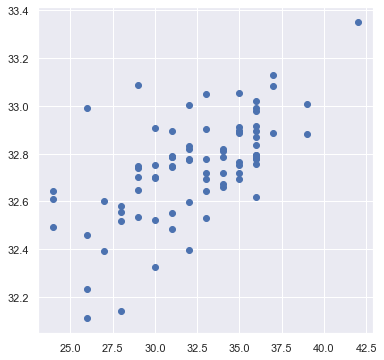

In [132]:
#Assumption on ridge regression
plt.scatter(y_test,elas_pred)

## Performance metrics

In [133]:
## Performance matric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elas_pred))
print(mean_absolute_error(y_test,elas_pred))
print(np.sqrt(mean_squared_error(y_test,elas_pred)))

13.07379348643209
2.963852314149394
3.615770109732101


In [134]:
# R square and adjusted r square
from sklearn.metrics import r2_score
elas_score=r2_score(y_test,las_pred)
elas_score

-0.042778338355931256

In [135]:
# adjusted r square
1-(1-elas_score)*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1)

-0.2066435058118632